cost= 0.340815 W= [ 0.25155199] b= [ 0.]
cost= 0.259985 W= [ 0.2833243] b= [ 0.05749801]
cost= 0.198377 W= [ 0.3111431] b= [ 0.10765077]
cost= 0.15142 W= [ 0.33550993] b= [ 0.15139134]
cost= 0.11563 W= [ 0.35686257] b= [ 0.18953428]
cost= 0.0883497 W= [ 0.37558332] b= [ 0.22279069]
cost= 0.0675556 W= [ 0.39200583] b= [ 0.2517814]
cost= 0.0517049 W= [ 0.40642145] b= [ 0.27704838]
cost= 0.0396219 W= [ 0.41908452] b= [ 0.29906479]
cost= 0.0304105 W= [ 0.43021709] b= [ 0.31824368]
cost= 0.0233877 W= [ 0.44001299] b= [ 0.33494565]
cost= 0.0180329 W= [ 0.44864148] b= [ 0.34948552]
cost= 0.0139495 W= [ 0.45625028] b= [ 0.36213812]
cost= 0.010835 W= [ 0.46296838] b= [ 0.3731434]
cost= 0.00845907 W= [ 0.4689084] b= [ 0.38271078]
cost= 0.00664605 W= [ 0.47416866] b= [ 0.39102316]
cost= 0.00526207 W= [ 0.47883496] b= [ 0.39824015]
cost= 0.00420512 W= [ 0.48298228] b= [ 0.40450114]
cost= 0.00339744 W= [ 0.48667601] b= [ 0.40992776]
cost= 0.00277977 W= [ 0.48997331] b= [ 0.41462624]
cost= 0.0023069

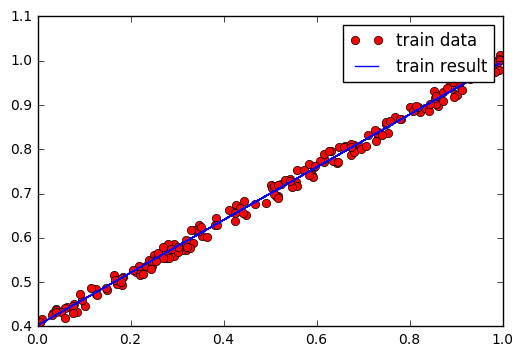

In [3]:
# 一元的线性回归模型训练演示
# 1.通过训练数据，推测出线性回归函数(y = w * x + b )中 w 和 b的值
# 2.通过验证数据，验证得到的函数是否符合预期。

# 引入Tensorflow
import tensorflow as tf
# 引入绘图工具
import matplotlib.pyplot as plt
# 引入数据模块
import testData as td

# 1.获取训练数据
# testData 由testData.py定义的线性函数生成
# get_train_data 获取训练数据 参数：data_length(获取数据的个数) 返回值：二维数组 [0] 代表x(横坐标) [1]代表y(纵坐标)
# get_validate_data 获取验证数据 参数：data_length(获取数据的个数) 返回值：二维数组 [0] 代表x(横坐标) [1]代表y(纵坐标)
trainDataset = td.get_train_data(200)
trainx = [v[0] for v in trainDataset]
trainy = [v[1] for v in trainDataset]

# 2.构造预测的线性回归函数 y = W * x + b
W = tf.Variable(tf.random_uniform([1]))
b = tf.Variable(tf.zeros([1]))
y = W * trainx + b

# 3.判断假设函数的好坏
# 代价函数 最小均方差
cost = tf.reduce_mean(tf.square(y-trainy))

# 4.调整假设函数
#梯度下降算法找最优解，学习率为0.05
optimizer = tf.train.GradientDescentOptimizer(0.05)
train = optimizer.minimize(cost)

with tf.Session() as sess:
    #############初始化所有变量值###############
    init = tf.global_variables_initializer()
    sess.run(init)

    #初始化的W和b的值
    print("cost=",sess.run(cost),"W=",sess.run(W),"b=",sess.run(b))

    #循环运行
    for k in range(500):
        sess.run(train)
        #输出训练好的W 和 b
        print("cost=", sess.run(cost), "W=", sess.run(W), "b=", sess.run(b))
    print ("执行完成!")

    #构造图形结构
    plt.plot(trainx, trainy, 'ro', label='train data')
    plt.plot(trainx, sess.run(y), label='train result')
    plt.legend()
    plt.show()

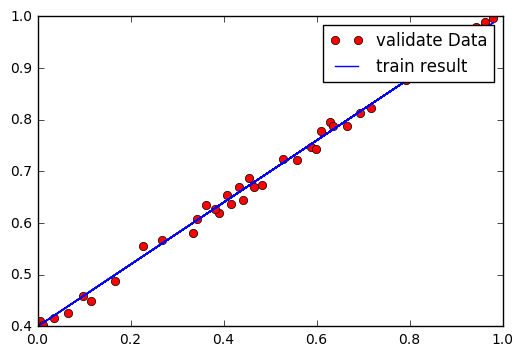

In [4]:
import matplotlib.pyplot as plt
#引入测试数据
import testData as pt

validateData = pt.get_validate_data(40)
va_x = [v[0] for v in validateData]
va_y = [v[1] for v in validateData]

#训练结果
y = []
for x in va_x :
    y.append(x * 0.6 + 0.4)


# 构造图形结构
plt.plot(va_x, va_y, 'ro', label='validate Data')
plt.plot(va_x,  y, label='train result')
plt.legend()
plt.show()